# 1번
철강데이터 종속변수 : target     
데이터 출처 : https://www.kaggle.com/uciml/faulty-steel-plates    
데이터 경로 : /kaggle/input/adp-kr-p4/problem1.csv

In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
df_1 = pd.read_csv('./problem1.csv')

### 1-1  EDA(탐색적 데이터 분석)을 하시오
(시각화와 통계량을 제시할 것)

In [10]:
pd.describe_option()
# col 생략 없이 출력
pd.set_option('display.max_columns', None)

compute.use_bottleneck : bool
    Use the bottleneck library to accelerate if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]
compute.use_numba : bool
    Use the numba engine option for select operations if it is installed,
    the default is False
    Valid values: False,True
    [default: False] [currently: False]
compute.use_numexpr : bool
    Use the numexpr library to accelerate computation if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]
display.chop_threshold : float or None
    if set to a float value, all float values smaller then the given threshold
    will be displayed as exactly 0 by repr and friends.
    [default: None] [currently: None]
display.colheader_justify : 'left'/'right'
    Controls the justification of column headers. used by DataFrameFormatter.
    [default: right] [currently: right]
display.column_space No description available.
    [defa

In [12]:
df_1.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,target
0,42,50,270900,270944,267,17,44,24220,76,108,1687,1,0,80,0.0498,0.2415,0.1818,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,1
1,645,651,2538079,2538108,108,10,30,11397,84,123,1687,1,0,80,0.7647,0.3793,0.2069,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,1
2,829,835,1553913,1553931,71,8,19,7972,99,125,1623,1,0,100,0.9710,0.3426,0.3333,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,1
3,853,860,369370,369415,176,13,45,18996,99,126,1353,0,1,290,0.7287,0.4413,0.1556,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,1
4,1289,1306,498078,498335,2409,60,260,246930,37,126,1353,0,1,185,0.0695,0.4486,0.0662,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,1


<AxesSubplot:ylabel='target'>

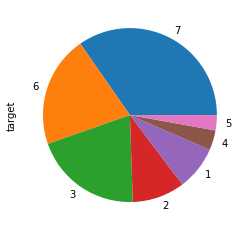

In [21]:
df_1.target.value_counts().plot(kind='pie') #총 7가지

In [19]:
df_1.info() #결측치 없음.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-null   float64
 15  Empt

In [28]:
df_1.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,target
count,1941.000000,1941.000000,1.941000e+03,1.941000e+03,1941.000000,1941.000000,1941.000000,1.941000e+03,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,571.136012,617.964451,1.650685e+06,1.650739e+06,1893.878413,111.855229,82.965997,2.063121e+05,84.548686,130.193715,1459.160227,0.400309,0.599691,78.737764,0.331715,0.414203,0.570767,0.033361,0.610529,0.813472,0.575734,2.492388,1.335686,1.403271,0.083288,-0.131305,0.585420,4.841319
std,520.690671,497.627410,1.774578e+06,1.774590e+06,5168.459560,301.209187,426.482879,5.122936e+05,32.134276,18.690992,144.577823,0.490087,0.490087,55.086032,0.299712,0.137261,0.271058,0.058961,0.243277,0.234274,0.482352,0.788930,0.481612,0.454345,0.500868,0.148767,0.339452,2.144175
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,1227.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.008300,0.001500,0.014400,0.048400,0.000000,0.301000,0.301000,0.000000,-0.991000,-0.998900,0.119000,1.000000
25%,51.000000,192.000000,4.712530e+05,4.712810e+05,84.000000,15.000000,13.000000,9.522000e+03,63.000000,124.000000,1358.000000,0.000000,0.000000,40.000000,0.060400,0.315800,0.361300,0.006600,0.411800,0.596800,0.000000,1.924300,1.000000,1.079200,-0.333300,-0.195000,0.248200,3.000000
50%,435.000000,467.000000,1.204128e+06,1.204136e+06,174.000000,26.000000,25.000000,1.920200e+04,90.000000,127.000000,1364.000000,0.000000,1.000000,70.000000,0.227300,0.412100,0.555600,0.010100,0.636400,0.947400,1.000000,2.240600,1.176100,1.322200,0.095200,-0.133000,0.506300,6.000000
75%,1053.000000,1072.000000,2.183073e+06,2.183084e+06,822.000000,84.000000,83.000000,8.301100e+04,106.000000,140.000000,1650.000000,1.000000,1.000000,80.000000,0.573800,0.501600,0.818200,0.023500,0.800000,1.000000,1.000000,2.914900,1.518500,1.732400,0.511600,-0.066600,0.999800,7.000000
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,1794.000000,1.000000,1.000000,300.000000,0.995200,0.943900,1.000000,0.875900,1.000000,1.000000,1.000000,5.183700,3.074100,4.258700,0.991700,0.642100,1.000000,7.000000


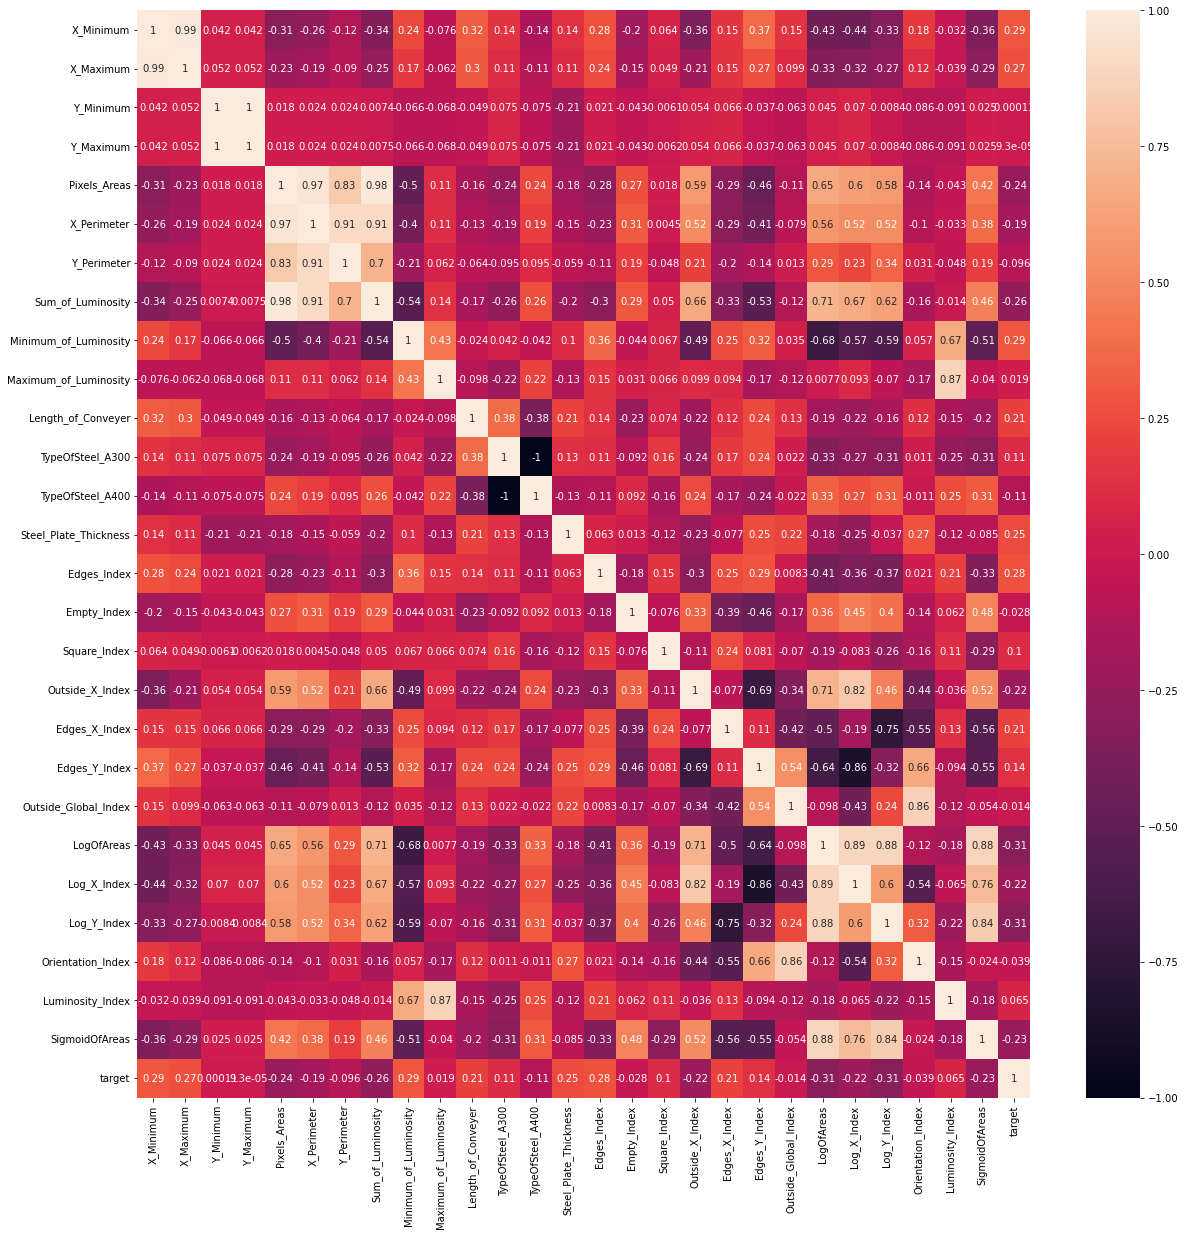

In [27]:
#상관관계 확인.
cor = df_1.corr()
plt.figure(figsize=(20,20))
sns.heatmap(cor,annot=True)
plt.show()

In [41]:
df_1.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,target
0,42,50,270900,270944,267,17,44,24220,76,108,1687,1,0,80,0.0498,0.2415,0.1818,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,1
1,645,651,2538079,2538108,108,10,30,11397,84,123,1687,1,0,80,0.7647,0.3793,0.2069,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,1
2,829,835,1553913,1553931,71,8,19,7972,99,125,1623,1,0,100,0.9710,0.3426,0.3333,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,1
3,853,860,369370,369415,176,13,45,18996,99,126,1353,0,1,290,0.7287,0.4413,0.1556,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,1
4,1289,1306,498078,498335,2409,60,260,246930,37,126,1353,0,1,185,0.0695,0.4486,0.0662,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,1


In [70]:
X_rng = np.array(df_1.loc[:,['X_Maximum']]) - np.array(df_1.loc[:,['X_Minimum']])
Y_rng = np.array(df_1.loc[:,['Y_Maximum']]) - np.array(df_1.loc[:,['Y_Minimum']])
lm_rng = np.array(df_1.loc[:,['Maximum_of_Luminosity']]) - np.array(df_1.loc[:,['Minimum_of_Luminosity']])

In [71]:
df_1['x_rng'] = X_rng
df_1['y_rng'] = Y_rng
df_1['lm_rng'] = lm_rng

In [72]:
df_1.corr().target #x_range 제외하면, 파생변수가 더 상관관계가 높음.

X_Minimum                0.291760
X_Maximum                0.269444
Y_Minimum                0.000106
Y_Maximum                0.000093
Pixels_Areas            -0.239093
X_Perimeter             -0.190590
Y_Perimeter             -0.096233
Sum_of_Luminosity       -0.264962
Minimum_of_Luminosity    0.289873
Maximum_of_Luminosity    0.018774
Length_of_Conveyer       0.206933
TypeOfSteel_A300         0.107571
TypeOfSteel_A400        -0.107571
Steel_Plate_Thickness    0.248673
Edges_Index              0.277779
Empty_Index             -0.028383
Square_Index             0.103521
Outside_X_Index         -0.224262
Edges_X_Index            0.214818
Edges_Y_Index            0.139338
Outside_Global_Index    -0.014042
LogOfAreas              -0.311516
Log_X_Index             -0.221141
Log_Y_Index             -0.310940
Orientation_Index       -0.039089
Luminosity_Index         0.064631
SigmoidOfAreas          -0.230643
target                   1.000000
x_rng                   -0.219722
y_rng         

In [76]:
X = df_1[df_1.columns.difference(['target'])]
y = df_1.loc[:,'target']

#### 1-2 변수 선택(VIF), 파생변수 생성, 데이터 분할(train/test(20%))

(시각화와 통계량을 제시할 것)

In [78]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif['Feature'] = X_train.columns
    vif['VIF_Factor'] = [variance_inflation_factor(X_train.values, i)
                         for i in range(X_train.shape[1])]
    return vif

vif = feature_engineering_XbyVIF(X)
print(vif) #Edge o , conveyor o, 

                  Feature   VIF_Factor
0             Edges_Index     1.321925
1           Edges_X_Index     5.708240
2           Edges_Y_Index     9.438620
3             Empty_Index    26.455078
4      Length_of_Conveyer     1.931458
5              LogOfAreas  1185.823932
6             Log_X_Index   491.169126
7             Log_Y_Index   405.579447
8        Luminosity_Index    12.931108
9   Maximum_of_Luminosity          inf
10  Minimum_of_Luminosity          inf
11      Orientation_Index    38.264122
12   Outside_Global_Index     5.831323
13        Outside_X_Index  1000.562693
14           Pixels_Areas   490.708612
15         SigmoidOfAreas     9.611151
16           Square_Index     1.838381
17  Steel_Plate_Thickness     1.266577
18      Sum_of_Luminosity   366.192390
19       TypeOfSteel_A300   503.745181
20       TypeOfSteel_A400   725.715182
21              X_Maximum          inf
22              X_Minimum          inf
23            X_Perimeter   168.782155
24              Y_Maximum

C:\Users\SCC202107006\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [156]:
vif = feature_engineering_XbyVIF(X[X.columns.difference(['LogOfAreas','Maximum_of_Luminosity','Minimum_of_Luminosity','x_rng','X_Maximum','Y_Maximum','Y_Minimum','Y_Perimeter','LogOfAreas','Orientation_Index','Log_X_Index','Pixels_Areas','X_Perimeter'])])
print(vif)

                  Feature  VIF_Factor
0             Edges_Index    1.299959
1           Edges_X_Index    3.956634
2           Edges_Y_Index    4.303561
3             Empty_Index    1.970636
4      Length_of_Conveyer    1.400686
5             Log_Y_Index   13.618981
6        Luminosity_Index    1.386292
7    Outside_Global_Index    2.341545
8         Outside_X_Index    3.836585
9          SigmoidOfAreas    7.278786
10           Square_Index    1.500856
11  Steel_Plate_Thickness    1.191797
12      Sum_of_Luminosity    9.612445
13       TypeOfSteel_A300  117.988864
14       TypeOfSteel_A400  166.582514
15              X_Minimum    1.371677
16                 lm_rng    3.179501
17                  y_rng    3.099110


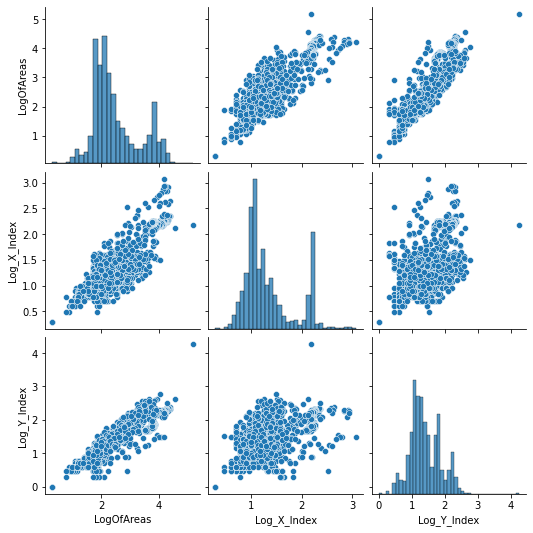

In [60]:
sns.pairplot(X[['LogOfAreas','Log_X_Index','Log_Y_Index']])

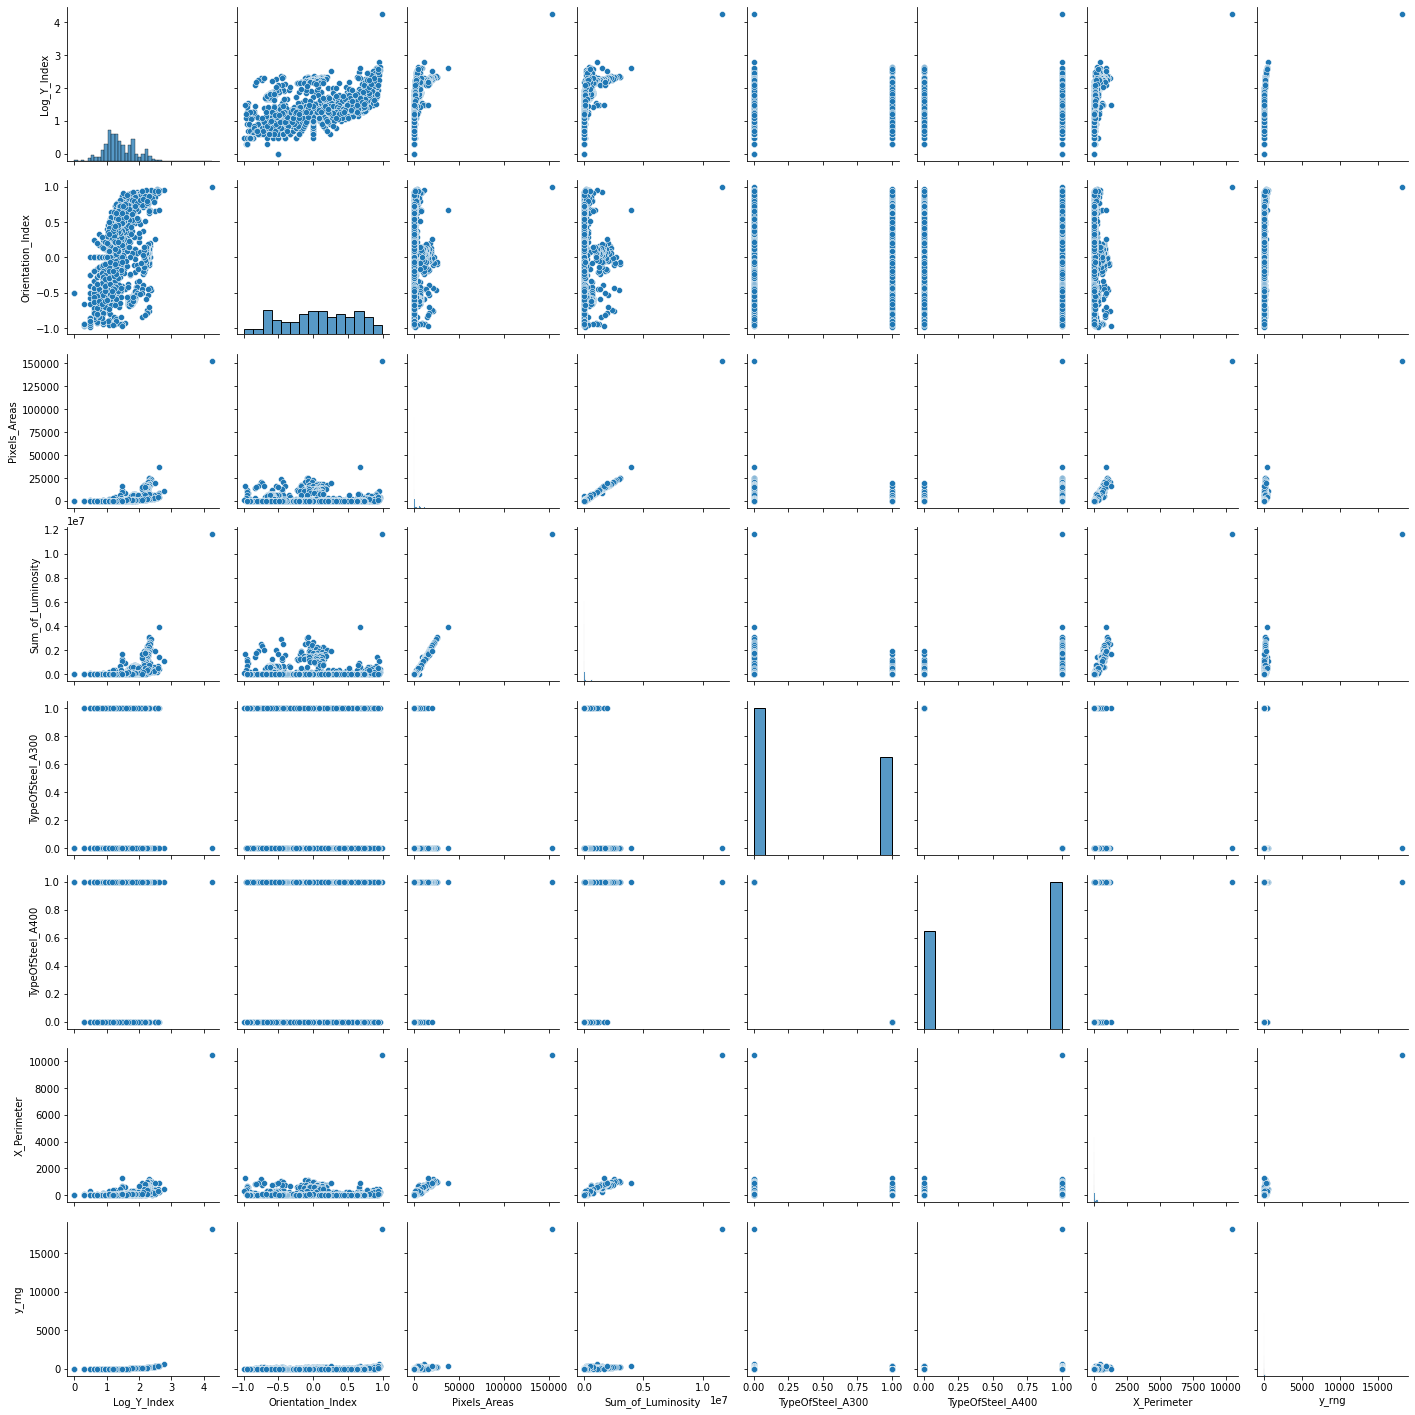

In [108]:
sns.pairplot(X[['Log_Y_Index','Orientation_Index','Pixels_Areas','Sum_of_Luminosity','TypeOfSteel_A300','TypeOfSteel_A400','X_Perimeter','y_rng']])

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X[X.columns.difference(['LogOfAreas','Maximum_of_Luminosity','Minimum_of_Luminosity','x_rng','X_Maximum','Y_Maximum','Y_Minimum','Y_Perimeter','LogOfAreas','Orientation_Index','Log_X_Index','Pixels_Areas','X_Perimeter'])],y, test_size=0.2)

In [158]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### 1-3 종속변수들중 "1"인지 아닌지 판단하려한다. 종속변수를 1과 1이 아닌 값(이항)으로 치환하고 로지스틱 회귀 분석을 실시하라.

confusionMatrix를 확인하고 최적의 cut off value 정하여라.

In [161]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs',C=1,random_state=5)
lr.fit(X_train, y_train)

#['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']

LogisticRegression(C=1, multi_class='multinomial', random_state=5)

In [163]:
from sklearn.metrics import confusion_matrix, accuracy_score

pred = lr.predict(X_test)

test_cm = confusion_matrix(y_test, pred)
test_ac = accuracy_score(y_test, pred)

print(test_cm)
print('\n')
print(round(test_ac, 4))

#행: 정답/ 열: 예측
#정답1, 6: 기타로 예측한 비율 높음.
# 1: Pastry
# 2: Z_Scratch
# 3: K_Scatch
# 4: Stains
# 5: Dirtiness
# 6: Bumps
# 7: Other_Faults

[[ 16   1   0   0   0   1  10]
 [  0  32   1   0   0   3   3]
 [  0   0  70   0   0   2   3]
 [  0   0   0  16   0   0   1]
 [  0   0   0   0   6   0   3]
 [  1   1   1   0   0  44  29]
 [  4   4   8   1   2  17 109]]


0.7532


#### 1-4 종속변수(y)를 다항(7 class)인 상태에서 SVM을 포함하여 3가지 알고리즘으로 평가하라.

각 모델에서 confusionMatrix를 확인하고 최적의 cut off value 를 정하여라.

##### svm

In [179]:
from sklearn.svm import SVC

svc = SVC(C=1, random_state=4)
svc.fit(X_train, y_train)

SVC(C=1, random_state=4)

In [180]:
pred = svc.predict(X_test)

test_cm = confusion_matrix(y_test, pred)
test_ac = accuracy_score(y_test, pred)

print(test_cm)
print('\n')
print(round(test_ac, 4))

[[ 15   0   0   0   0   7   6]
 [  0  33   0   0   0   2   4]
 [  0   0  69   0   0   2   4]
 [  0   0   0  15   0   0   2]
 [  0   0   0   0   4   1   4]
 [  1   1   0   0   0  55  19]
 [  4   3   4   1   1  19 113]]


0.7815


##### 랜덤포레스트

In [194]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100,min_samples_split=10, random_state=4)
rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=10, random_state=4)

In [195]:
pred = rf.predict(X_test)

test_cm = confusion_matrix(y_test, pred)
test_ac = accuracy_score(y_test, pred)

print(test_cm)
print('\n')
print(round(test_ac, 4))

[[ 15   0   0   0   0   2  11]
 [  0  35   0   0   0   0   4]
 [  0   0  71   0   0   1   3]
 [  0   0   0  15   0   1   1]
 [  0   0   0   0   7   0   2]
 [  2   0   1   0   0  50  23]
 [  5   2   2   1   0  16 119]]


0.8021


##### XGBOOST

In [267]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(n_estimators=400, learning_rate=0.01,random_state=4)
xgb_clf.fit(X_train, y_train)

[23:28:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=400, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=4, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [268]:
pred = xgb_clf.predict(X_test)

test_cm = confusion_matrix(y_test, pred)
test_ac = accuracy_score(y_test, pred)

print(test_cm)
print('\n')
print(round(test_ac, 4))

[[ 15   0   0   0   0   2  11]
 [  0  36   1   0   0   0   2]
 [  0   0  72   0   0   1   2]
 [  0   0   0  15   0   1   1]
 [  0   0   0   0   6   0   3]
 [  1   1   1   0   0  50  23]
 [  4   2   2   0   0  19 118]]


0.8021


#### 1-5 종속변수를 제외한 나머지 데이터를 바탕으로 군집분석을 실시하고 최적의 군집수와 군집 레이블을 구하여라.


군집레이블을 추가한 데이터를 1-4에서 만든 모델중 가장 성능이 좋았던 하나의 모델에 다시 학습하여 F1-score를 비교하라

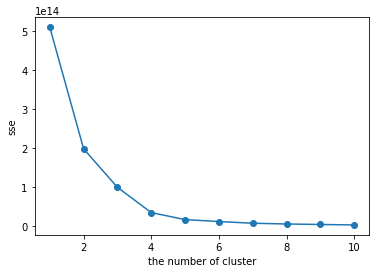

[509143664413675.94, 198387847117798.9, 100075449587371.33, 35482077384701.52, 17547225231743.316, 12588998532341.791, 8295948897131.84, 6354580891076.361, 5063996626311.027, 3985518688497.106]


In [313]:
from sklearn.cluster import KMeans
X_cluster = X[X.columns.difference(['LogOfAreas','Maximum_of_Luminosity','Minimum_of_Luminosity','x_rng','X_Maximum','Y_Maximum','Y_Minimum','Y_Perimeter','LogOfAreas','Orientation_Index','Log_X_Index','Pixels_Areas','X_Perimeter'])]

def elbow(x):
    sse = []
    for i in range(1,11):
        km = KMeans(n_clusters=i, random_state=4)
        km.fit(x)
        sse.append(km.inertia_)
        
    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('the number of cluster')
    plt.ylabel('sse')
    plt.show()
    print(sse)

elbow(X_cluster)

#4가 적당해보임.
#X_cluster = X[X.columns.difference(['LogOfAreas','Maximum_of_Luminosity','Minimum_of_Luminosity','x_rng','X_Maximum','Y_Maximum','Y_Minimum','Y_Perimeter','LogOfAreas','Orientation_Index','Log_X_Index','Pixels_Areas','X_Perimeter'])]
#sc = StandardScaler()
#sc.fit_transform(X_cluster)


In [332]:
km = KMeans(n_clusters=4, random_state=4)
km.fit(X_cluster)
new = km.labels_

In [333]:
col = X.columns.difference(['LogOfAreas','Maximum_of_Luminosity','Minimum_of_Luminosity','x_rng','X_Maximum','Y_Maximum','Y_Minimum','Y_Perimeter','LogOfAreas','Orientation_Index','Log_X_Index','Pixels_Areas','X_Perimeter'])

In [340]:
km_df = pd.DataFrame(X_cluster, columns = col)

In [341]:
np.unique(new, return_counts = True)

(array([0, 1, 2, 3]), array([1587,  244,  109,    1], dtype=int64))

In [342]:
X_train, X_test, y_train, y_test = train_test_split(X_cluster,new, test_size=0.2)

In [344]:
rf = RandomForestClassifier(n_estimators=100,min_samples_split=10, random_state=4)
rf.fit(X_train, y_train)

pred = rf.predict(X_test)

test_cm = confusion_matrix(y_test, pred)
test_ac = accuracy_score(y_test, pred)

print(test_cm)
print('\n')
print(round(test_ac, 4))

#99.7!

[[325   0   0]
 [  0  43   0]
 [  0   1  20]]


0.9974


# 2번 전력데이터
데이터 출처 : 직접제작    
데이터 설명 : 2050년 1년동안의 5유형(A,B,C,D,E)의 전력사용량을 나타낸다. 각유형의 전력사용량은 1분마다 갱신되며 그 값은 누적된다.       
6시간이 지나면(00:00, 06:00, 12:00, 18:00시에) 전력사용량은 0으로 초기화 된다.

- /kaggle/input/adp-kr-p4/problem2_usage.csv   
6시간 간격의 총 전력사용량의 데이터이다. timestamp순서는 섞여있다.      
6시간 간격의 특정 시간대(마지막시각 '05:59','11:59','17:59','23:59')의 전력 총합을 나타낸다.     
데이터의 총합을 구해서 비교할때 부동소수점 오류가 날수 있다. 파이썬의 경우 round(4)를 취하여 해결한다.    


- /kaggle/input/adp-kr-p4/problem2_usage_history.csv   
1분간격의 A,B,C,D,E 유형의 소비 누적 전력을 나타낸다. 같은 6시간간격의 시간대의 데이터는 같은 "6hour_index"값을 가진다.    
00:00, 06:00, 12:00, 18:00시에는 5유형의 전력은 초기화 된다.     
데이터의 총합을 구해서 비교할때 부동소수점 오류가 날수 있다. 파이썬의 경우 round(4)를 취하여 해결한다.     
 

- /kaggle/input/adp-kr-p4/problem2_avg_tem.csv    
2050년 1년동안 일자별 평균 온도를 나타낸다     

In [472]:
usg = pd.read_csv('./problem2_usage.csv')
usg_hst = pd.read_csv('./problem2_usage_history.csv')
avg = pd.read_csv('./problem2_avg_tem.csv')

In [473]:
usg.head()

,timestamp,usage
0,2551780740,583.7395
1,2534068740,1018.0731
2,2545732740,1034.5041
3,2545559940,350.5153
4,2550247140,652.4857


In [492]:
import datetime #import datetime


#### 2-1 usage의 총사용량을 아래와 같은 모양으로 연월별 총합으로 계산하여 CSV 파일로 작성하시오.    
- 일자별 총사용량은 누적사용량이 갱신되기 직전의 최대값들의 합으로 계산한다     
- ['05:59','11:59','17:59','23:59'] 시간대의 A,B,C,D,E의 컬럼별 총합이 각 유형의 일일 사용량이다

In [478]:
dt_obj = [datetime.datetime.fromtimestamp(usg.timestamp[i]) for i in range(len(usg))]

In [484]:
usg['timestamp'] = dt_obj
usg_2 = usg.sort_values(by=['timestamp'], axis=0)

In [494]:
usg_2['date'] = [datetime.date(usg_2.timestamp[i].year,usg_2.timestamp[i].month,usg_2.timestamp[i].day) for i in range(len(usg_2))]

In [495]:
usg_2

,timestamp,usage,date
654,2050-01-01 14:59:00,1654.2596,2050-11-11
255,2050-01-01 20:59:00,1426.9071,2050-04-20
1327,2050-01-02 02:59:00,1448.2517,2050-09-02
671,2050-01-02 08:59:00,1338.0897,2050-08-31
379,2050-01-02 14:59:00,1567.5820,2050-10-25
...,...,...,...
1319,2050-12-31 08:59:00,830.1747,2050-12-06
1162,2050-12-31 14:59:00,1353.2138,2050-09-02
1267,2050-12-31 20:59:00,841.3836,2050-03-17
1120,2051-01-01 02:59:00,1439.1423,2050-01-11


In [522]:
usg_2.groupby('date').sum().reset_index()['date'][:-1]

0      2050-01-01
1      2050-01-02
2      2050-01-03
3      2050-01-04
4      2050-01-05
          ...    
360    2050-12-27
361    2050-12-28
362    2050-12-29
363    2050-12-30
364    2050-12-31
Name: date, Length: 365, dtype: object

In [557]:
usg_hst

,hh:mm,6hour_index,A,B,C,D,E
0,00:00,DA_588493,0.0000,0.0000,0.0000,0.0000,0.0000
1,00:01,DA_588493,0.7025,0.8029,0.6523,2.6762,0.1505
2,00:02,DA_588493,1.7563,1.2043,1.9570,3.2115,0.6022
3,00:03,DA_588493,2.1075,1.6057,2.1744,6.4229,1.0538
4,00:04,DA_588493,2.8100,2.4086,2.6093,6.9582,1.2043
...,...,...,...,...,...,...,...
525595,23:55,DA_2650332,56.1072,357.1460,316.9747,298.3290,823.7400
525596,23:56,DA_2650332,56.2778,358.2261,318.5853,299.2385,825.4075
525597,23:57,DA_2650332,56.6757,358.5861,318.9074,299.5417,827.0750
525598,23:58,DA_2650332,56.7326,359.3062,320.8402,301.6640,827.9087


In [563]:
#['05:59','11:59','17:59','23:59'] 
a = usg_hst[usg_hst['hh:mm']=='05:59']['A'].values + usg_hst[usg_hst['hh:mm']=='11:59']['A'].values + usg_hst[usg_hst['hh:mm']=='17:59']['A'].values + usg_hst[usg_hst['hh:mm']=='23:59']['A'].values
b = usg_hst[usg_hst['hh:mm']=='05:59']['B'].values +usg_hst[usg_hst['hh:mm']=='11:59']['B'].values +usg_hst[usg_hst['hh:mm']=='17:59']['B'].values +usg_hst[usg_hst['hh:mm']=='23:59']['B'].values
c = usg_hst[usg_hst['hh:mm']=='05:59']['C'].values +usg_hst[usg_hst['hh:mm']=='11:59']['C'].values +usg_hst[usg_hst['hh:mm']=='17:59']['C'].values +usg_hst[usg_hst['hh:mm']=='23:59']['C'].values
d = usg_hst[usg_hst['hh:mm']=='05:59']['D'].values +usg_hst[usg_hst['hh:mm']=='11:59']['D'].values +usg_hst[usg_hst['hh:mm']=='17:59']['D'].values +usg_hst[usg_hst['hh:mm']=='23:59']['D'].values
e = usg_hst[usg_hst['hh:mm']=='05:59']['E'].values +usg_hst[usg_hst['hh:mm']=='11:59']['E'].values +usg_hst[usg_hst['hh:mm']=='17:59']['E'].values +usg_hst[usg_hst['hh:mm']=='23:59']['E'].values
full = a + b + c + d + e
#a + b + c + d

In [565]:
df_usg = pd.DataFrame()
df_usg['date'] = usg_2.groupby('date').sum().reset_index()['date'][:-1].values

In [568]:
df_usg['A'] = a
df_usg['B'] = b
df_usg['C'] = c
df_usg['D'] = d
df_usg['E'] = e
df_usg['full'] = full

In [569]:
df_usg

,date,A,B,C,D,E,full
0,2050-01-01,1583.1230,1748.4258,719.0734,1512.2236,304.6623,5867.5081
1,2050-01-02,1084.4828,2167.1320,1227.6223,484.2982,1095.9014,6059.4367
2,2050-01-03,152.3612,394.0491,321.2149,982.0407,498.5167,2348.1826
3,2050-01-04,1225.0208,769.0568,655.4110,791.3395,834.6589,4275.4870
4,2050-01-05,836.8017,552.5661,1216.6259,1042.4509,666.6004,4315.0450
...,...,...,...,...,...,...,...
360,2050-12-27,1131.9901,944.7511,378.1692,438.1096,785.5438,3678.5638
361,2050-12-28,1114.3264,625.4472,1008.9049,914.4681,452.7479,4115.8945
362,2050-12-29,990.3719,776.5802,1085.4244,815.7627,367.3374,4035.4766
363,2050-12-30,1463.7257,908.3342,655.1917,539.5316,852.7281,4419.5113


In [570]:
df_usg['year'] = [df_usg.date[i].year for i in range(len(df_usg))]
df_usg['month'] = [df_usg.date[i].month for i in range(len(df_usg))]

In [571]:
df_usg.groupby(['year','month']).sum()

A           B           C           D           E  \
year month                                                               
2050 1      25437.7174  29524.6880  26325.6721  26787.3492  24378.5654   
     2      22587.0869  27962.4256  21188.7855  23261.3711  24636.3545   
     3      28677.4668  23861.8640  23680.9832  26945.8322  27807.9163   
     4      24420.2217  27322.6681  26299.6225  27226.8895  24303.1778   
     5      27028.2178  25173.2009  30392.3686  28374.1651  26624.1963   
     6      23862.7219  25125.0544  26334.0899  23571.0519  32754.0932   
     7      26248.3486  25135.6214  28735.8080  31315.0381  27056.5461   
     8      29171.1880  26769.4921  20612.4922  27432.0263  23671.4985   
     9      26819.4225  31334.2996  25562.1052  22301.2104  25674.1093   
     10     26625.0033  31567.2153  27878.8204  26277.2181  29153.3849   
     11     24428.1793  25954.0829  26846.9570  25095.3070  21936.6133   
     12     28772.9185  28289.4406  23454.8789  28347.7543  24565.2342   

                   full  
year month               
2050 1      132453.9921  
     2      119636.0236  
     3      130974.0625  
     4      129572.5796  
     5      137592.1487  
     6      131647.0113  
     7      138491.3622  
     8      127656.6971  
     9      131691.1470  
     10     141501.6420  
     11     124261.1395  
     12     133430.2265

#### 2-2 가로축을 요일(일~월) 세로축을 평균 전력사용량으로 하는 그래프를 그려라. 각 유형별로 색을 다르게 표현하여 5개의 line plot을 그리며 범례를 표시하라

In [572]:
#요일별 평균 전력 사용량 검정
weekday_ = [df_usg.date[i].weekday() for i in range(len(df_usg))]
#datetime.date(int(year_[0]), int(month_[0]), int(day_[0])).weekday()

In [573]:
df_usg['weekday'] = weekday_

In [574]:
df_weekday = df_usg.groupby('weekday').mean()
df_weekday.reset_index(inplace=True)
df_weekday

,weekday,A,B,C,D,E,full,year,month
0,0,673.744471,775.036663,702.495327,778.445513,694.785656,3624.507631,2050.0,6.461538
1,1,793.740256,775.320904,717.699188,723.901138,720.253840,3730.915327,2050.0,6.519231
2,2,758.510413,703.582162,701.678988,708.008392,699.895421,3571.675377,2050.0,6.538462
3,3,762.993615,693.684079,643.619888,709.325115,788.118737,3597.741435,2050.0,6.576923
4,4,778.184223,765.871610,689.122890,731.251890,688.666733,3653.097346,2050.0,6.615385
5,5,1221.588434,1312.194668,1192.728034,1170.996675,1144.699909,6042.207721,2050.0,6.528302
6,6,1027.717515,1257.153342,1239.575981,1250.460054,1252.367971,6027.274863,2050.0,6.442308


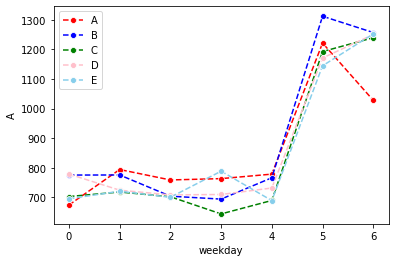

In [579]:
color = ['r','b','g','pink','skyblue']
for i, c in zip(['A','B','C','D','E'],color):
    sns.lineplot(x=df_weekday.weekday, y=df_weekday[i], 
                 color=c, # 색상
                 linestyle='--', # 라인 스타일
                 marker='o') # 마커
    plt.legend(['A','B','C','D','E'])

#### 2-3 요일별 각 유형의 평균 전력 사용량 간에 연관성이 있는지 검정하라

In [586]:
df_weekday

array([[0.00000000e+00, 6.73744471e+02, 7.75036663e+02, 7.02495327e+02,
        7.78445513e+02, 6.94785656e+02, 3.62450763e+03, 2.05000000e+03,
        6.46153846e+00],
       [1.00000000e+00, 7.93740256e+02, 7.75320904e+02, 7.17699188e+02,
        7.23901138e+02, 7.20253840e+02, 3.73091533e+03, 2.05000000e+03,
        6.51923077e+00],
       [2.00000000e+00, 7.58510413e+02, 7.03582162e+02, 7.01678988e+02,
        7.08008392e+02, 6.99895421e+02, 3.57167538e+03, 2.05000000e+03,
        6.53846154e+00],
       [3.00000000e+00, 7.62993615e+02, 6.93684079e+02, 6.43619888e+02,
        7.09325115e+02, 7.88118737e+02, 3.59774143e+03, 2.05000000e+03,
        6.57692308e+00],
       [4.00000000e+00, 7.78184223e+02, 7.65871610e+02, 6.89122890e+02,
        7.31251890e+02, 6.88666733e+02, 3.65309735e+03, 2.05000000e+03,
        6.61538462e+00],
       [5.00000000e+00, 1.22158843e+03, 1.31219467e+03, 1.19272803e+03,
        1.17099668e+03, 1.14469991e+03, 6.04220772e+03, 2.05000000e+03,
        6.5

In [619]:
np_t = np.array(df_weekday[['A','B','C','D','E']].T)

In [630]:
df_weekday[['A','B','C','D','E']].T

,0,1,2,3,4,5,6
A,673.744471,793.740256,758.510413,762.993615,778.184223,1221.588434,1027.717515
B,775.036663,775.320904,703.582162,693.684079,765.871610,1312.194668,1257.153342
C,702.495327,717.699188,701.678988,643.619888,689.122890,1192.728034,1239.575981
D,778.445513,723.901138,708.008392,709.325115,731.251890,1170.996675,1250.460054
E,694.785656,720.253840,699.895421,788.118737,688.666733,1144.699909,1252.367971


In [633]:
np_t

array([[ 673.74447115,  793.74025577,  758.51041346,  762.99361538,
         778.18422308, 1221.58843396, 1027.71751538],
       [ 775.03666346,  775.32090385,  703.58216154,  693.68407885,
         765.87160962, 1312.19466792, 1257.15334231],
       [ 702.49532692,  717.69918846,  701.67898846,  643.61988846,
         689.12289038, 1192.72803396, 1239.57598077],
       [ 778.44551346,  723.90113846,  708.00839231,  709.32511538,
         731.25189038, 1170.99667547, 1250.46005385],
       [ 694.78565577,  720.25384038,  699.89542115,  788.11873654,
         688.66673269, 1144.69990943, 1252.36797115]])

In [634]:
np_ = np.append(np_t[:,0],np_t[:,1])
np_ = np.append(np_,np_t[:,2])
np_ = np.append(np_,np_t[:,3])
np_ = np.append(np_,np_t[:,4])
np_ = np.append(np_,np_t[:,5])
np_ = np.append(np_,np_t[:,6])#

In [642]:
col = []
for k in ['0','1','2','3','4','5','6']:
    for i in range(5):
        col.append(k)
        
col_2 = []
for i in range(7):
    for k in ['A','B','C','D','E']:
        col_2.append(k)

In [644]:
dfdf = pd.DataFrame()
dfdf['weekday'] = col
dfdf['type'] = col_2
dfdf['mean'] = np_

In [645]:
dfdf

,weekday,type,mean
0,0,A,673.744471
1,0,B,775.036663
2,0,C,702.495327
3,0,D,778.445513
4,0,E,694.785656
5,1,A,793.740256
6,1,B,775.320904
7,1,C,717.699188
8,1,D,723.901138
9,1,E,720.253840


In [649]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols('mean ~ C(weekday) * C(type)',dfdf).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(weekday),6.0,1.647583e+06,2.745972e+05,0.0,NaN
C(type),4.0,1.231165e+04,3.077911e+03,0.0,NaN
C(weekday):C(type),24.0,8.108047e+04,3.378353e+03,0.0,NaN
Residual,0.0,1.680211e-23,inf,NaN,NaN


In [646]:
df_weekday[['A','B','C','D','E']]

,A,B,C,D,E
0,673.744471,775.036663,702.495327,778.445513,694.785656
1,793.740256,775.320904,717.699188,723.901138,720.253840
2,758.510413,703.582162,701.678988,708.008392,699.895421
3,762.993615,693.684079,643.619888,709.325115,788.118737
4,778.184223,765.871610,689.122890,731.251890,688.666733
5,1221.588434,1312.194668,1192.728034,1170.996675,1144.699909
6,1027.717515,1257.153342,1239.575981,1250.460054,1252.367971


#### 2-4 일자(매일)마다 각 유형의 전력사용량의 합을 데이터프레임으로 구하고 일자 데이터에서의 유형별 온도와의 상관계수를 각각 구하여라

In [653]:
dfdfdf = df_usg.groupby('date').sum()[['A','B','C','D','E']]

In [656]:
dfdfdf['tmp'] = avg.temperature.values

In [657]:
dfdfdf

,A,B,C,D,E,tmp
date,,,,,,
2050-01-01,1583.1230,1748.4258,719.0734,1512.2236,304.6623,6.164408
2050-01-02,1084.4828,2167.1320,1227.6223,484.2982,1095.9014,1.015510
2050-01-03,152.3612,394.0491,321.2149,982.0407,498.5167,3.691252
2050-01-04,1225.0208,769.0568,655.4110,791.3395,834.6589,4.071515
2050-01-05,836.8017,552.5661,1216.6259,1042.4509,666.6004,0.609249
...,...,...,...,...,...,...
2050-12-27,1131.9901,944.7511,378.1692,438.1096,785.5438,6.588207
2050-12-28,1114.3264,625.4472,1008.9049,914.4681,452.7479,3.201014
2050-12-29,990.3719,776.5802,1085.4244,815.7627,367.3374,0.670169


In [659]:
#답
dfdfdf.corr()['tmp']

A      0.001472
B     -0.048002
C      0.045952
D     -0.010146
E      0.074246
tmp    1.000000
Name: tmp, dtype: float64